

# What is BeautifulSoup 

BeautifulSoup is a Python library for pulling data out of HTML and XML files. With it, you can parse HTML and navigate the parse tree to extract the data you need.

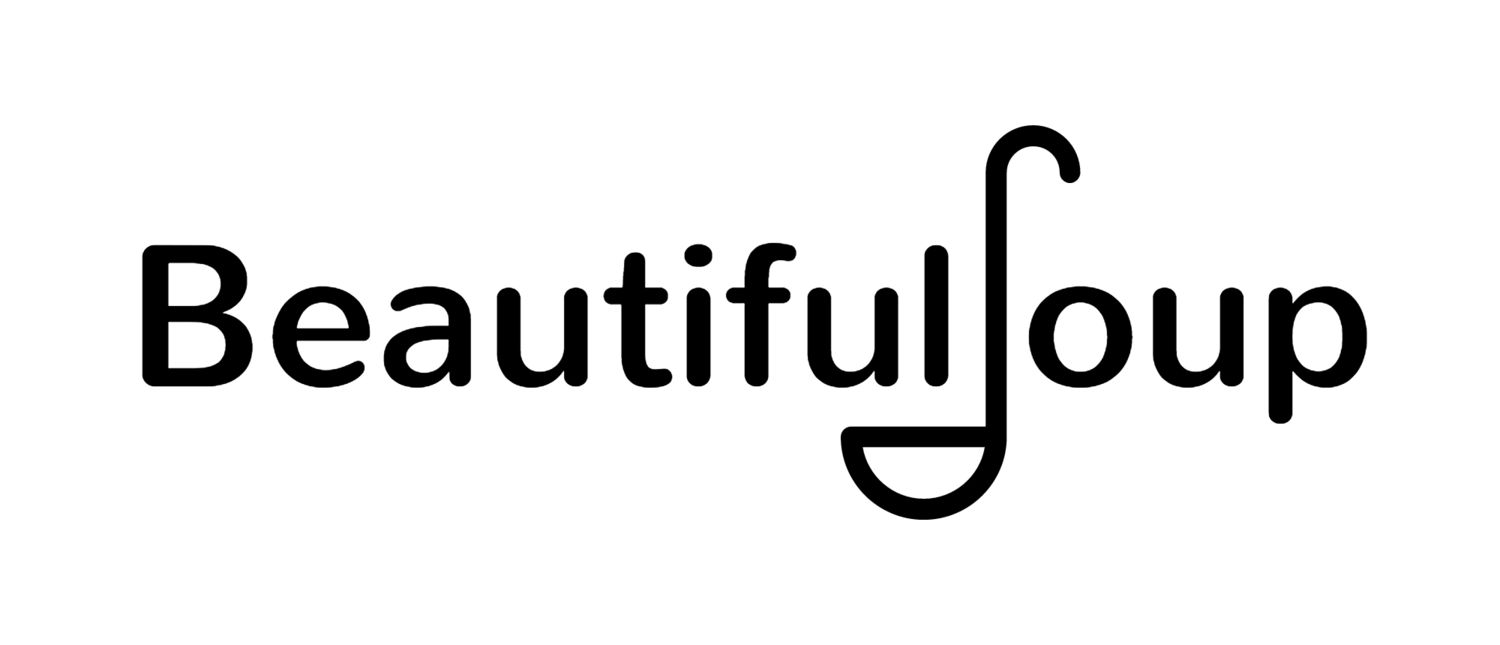

https://www.basketball-reference.com/leagues/NBA_2020_totals.html


In [ ]:
#pip install beautifulsoup4

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'https://www.basketball-reference.com/leagues/NBA_2020_totals.html'
req = requests.get(url)
print(req) #To verify output

<Response [200]>


In [3]:
soup = BeautifulSoup(req.content, 'html.parser')
print(soup) #To verify output (VERY LONG)


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202402261" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME = '__tcfapiL

In [4]:
tabela = soup.find(name='table')
print(tabela)

<table class="sortable stats_table" data-cols-to-freeze=",2" data-non-qual="1" data-qual-label=" When table is sorted, hide non-qualifiers for rate stats" data-qual-text="" id="totals_stats">
<caption>Player Totals Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Rk" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
<th aria-label="Pos" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
<th aria-label="Age" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th>
<th aria-label="Tm" class="poptip s

In [5]:
df = pd.read_html(str(tabela))[0].set_index('Rk') #We use "[0]" because the output would be a list with a single element, and we need that element, not the list
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Steven Adams,C,26,OKC,63,63,1680,283,478,.592,...,.582,207,376,583,146,51,67,94,122,684
2,Bam Adebayo,PF,22,MIA,72,72,2417,440,790,.557,...,.691,176,559,735,368,82,93,204,182,1146
3,LaMarcus Aldridge,C,34,SAS,53,53,1754,391,793,.493,...,.827,103,289,392,129,36,87,74,128,1001
4,Kyle Alexander,C,23,MIA,2,0,13,1,2,.500,...,NaN,2,1,3,0,0,0,1,1,2
5,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,98,266,.368,...,.676,9,75,84,89,17,8,54,57,267


In [6]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Steven Adams,C,26,OKC,63,63,1680,283,478,.592,...,.582,207,376,583,146,51,67,94,122,684
2,Bam Adebayo,PF,22,MIA,72,72,2417,440,790,.557,...,.691,176,559,735,368,82,93,204,182,1146
3,LaMarcus Aldridge,C,34,SAS,53,53,1754,391,793,.493,...,.827,103,289,392,129,36,87,74,128,1001
4,Kyle Alexander,C,23,MIA,2,0,13,1,2,.500,...,NaN,2,1,3,0,0,0,1,1,2
5,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,98,266,.368,...,.676,9,75,84,89,17,8,54,57,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Trae Young,PG,21,ATL,60,60,2120,546,1249,.437,...,.860,32,223,255,560,65,8,289,104,1778
526,Cody Zeller,C,27,CHO,58,39,1341,251,479,.524,...,.682,160,251,411,88,40,25,75,140,642
527,Tyler Zeller,C,30,SAS,2,0,4,1,4,.250,...,NaN,3,1,4,0,0,0,0,0,2
